<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ резюме из HeadHunter
   

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.io as pio

In [2]:
# Use only one of the following lines:

# Display interactive graphs
# pio.renderers.default = 'plotly_mimetype+notebook'

# Display image of graphs for correct displaying on GitHub 
pio.renderers.default = 'png'

# Исследование структуры данных

1. Прочитайте данные с помощью библиотеки Pandas. Совет: перед чтением обратите внимание на разделитель внутри файла. 

In [3]:
data_hh = pd.read_csv('data/dst-3.0_16_1_hh_database.csv', sep=';')
data_hh.shape

(44744, 12)

2. Выведите несколько первых (последних) строк таблицы, чтобы убедиться в том, что ваши данные не повреждены. Ознакомьтесь с признаками и их структурой.

In [4]:
data_hh.head(3)

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
0,"Мужчина , 39 лет , родился 27 ноября 1979",29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...",Опыт работы 16 лет 10 месяцев Август 2010 — п...,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,Неоконченное высшее образование 2000 Балтийск...,16.04.2019 15:59,Имеется собственный автомобиль
1,"Мужчина , 60 лет , родился 20 марта 1959",40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Опыт работы 19 лет 5 месяцев Январь 2000 — по...,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",Высшее образование 1981 Военно-космическая ак...,12.04.2019 08:42,Не указано
2,"Женщина , 36 лет , родилась 12 августа 1982",20000 руб.,Оператор,"Тверь , не готова к переезду , не готова к ком...",полная занятость,полный день,Опыт работы 10 лет 3 месяца Октябрь 2004 — Де...,ПАО Сбербанк,Кассир-операционист,Среднее специальное образование 2002 Профессио...,16.04.2019 08:35,Не указано


3. Выведите основную информацию о числе непустых значений в столбцах и их типах в таблице.

In [5]:
data_hh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

4. Обратите внимание на информацию о числе непустых значений.

In [6]:
columns_with_null = {}

for column in data_hh.columns:
    not_null_rows = data_hh[column].notna().value_counts()[0]
    all_rows = data_hh.shape[0]
    
    if not_null_rows < all_rows:
        columns_with_null[column] = not_null_rows
        
for key, value in columns_with_null.items():
    print(f'Признак: {key}. Число непустых значений: {value}.')

Признак: Опыт работы. Число непустых значений: 44576.
Признак: Последнее/нынешнее место работы. Число непустых значений: 44743.
Признак: Последняя/нынешняя должность. Число непустых значений: 44742.


5. Выведите основную статистическую информацию о столбцах.


In [7]:
data_hh.describe()

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
count,44744,44744,44744,44744,44744,44744,44576,44743,44742,44744,44744,44744
unique,16003,690,14929,10063,38,47,44413,30214,16927,40148,18838,2
top,"Мужчина , 32 года , родился 17 сентября 1986",50000 руб.,Системный администратор,"Москва , не готов к переезду , не готов к кома...",полная занятость,полный день,Опыт работы 10 лет 8 месяцев Апрель 2018 — по...,Индивидуальное предпринимательство / частная п...,Системный администратор,Высшее образование 1987 Военный инженерный Кра...,07.05.2019 09:50,Не указано
freq,18,4064,3099,1261,30026,22727,3,935,2062,4,25,32268


# Преобразование данных

1. Начнем с простого - с признака **"Образование и ВУЗ"**. Его текущий формат это: **<Уровень образования год выпуска ВУЗ специальность...>**. Например:
* Высшее образование 2016 Московский авиационный институт (национальный исследовательский университет)...
* Неоконченное высшее образование 2000  Балтийская государственная академия рыбопромыслового флота…
Нас будет интересовать только уровень образования.

Создайте с помощью функции-преобразования новый признак **"Образование"**, который должен иметь 4 категории: "высшее", "неоконченное высшее", "среднее специальное" и "среднее".

Выполните преобразование, ответьте на контрольные вопросы и удалите признак "Образование и ВУЗ".

Совет: обратите внимание на структуру текста в столбце **"Образование и ВУЗ"**. Гарантируется, что текущий уровень образования соискателя всегда находится в первых 2ух слов и начинается с заглавной буквы. Воспользуйтесь этим.

*Совет: проверяйте полученные категории, например, с помощью метода unique()*


In [8]:
def education_conversion(education_raw:str):
        # Make a string of the first two words
        education_string = ' '.join(education_raw.split()[0:2])
        # Delete word 'образование'
        if 'образование' in education_string.split():
                return education_string.split()[0].lower()
        return education_string.lower()
        
data_hh['Образование'] = data_hh['Образование и ВУЗ'].apply(education_conversion)
data_hh.drop('Образование и ВУЗ', axis=1, inplace=True)

display(data_hh['Образование'].unique(),
        data_hh['Образование'].value_counts())

array(['неоконченное высшее', 'высшее', 'среднее специальное', 'среднее'],
      dtype=object)

высшее                 33863
среднее специальное     5765
неоконченное высшее     4557
среднее                  559
Name: Образование, dtype: int64

2. Теперь нас интересует столбец **"Пол, возраст"**. Сейчас он представлен в формате **<Пол , возраст , дата рождения >**. Например:
* Мужчина , 39 лет , родился 27 ноября 1979 
* Женщина , 21 год , родилась 13 января 2000
Как вы понимаете, нам необходимо выделить каждый параметр в отдельный столбец.

Создайте два новых признака **"Пол"** и **"Возраст"**. При этом важно учесть:
* Признак пола должен иметь 2 уникальных строковых значения: 'М' - мужчина, 'Ж' - женщина. 
* Признак возраста должен быть представлен целыми числами.

Выполните преобразование, ответьте на контрольные вопросы и удалите признак **"Пол, возраст"** из таблицы.

*Совет: обратите внимание на структуру текста в столбце, в части на то, как разделены параметры пола, возраста и даты рождения между собой - символом ' , '. 
Гарантируется, что структура одинакова для всех строк в таблице. Вы можете воспользоваться этим.*


In [9]:
data_hh['Пол'] = data_hh['Пол, возраст'].apply(lambda bio_data: bio_data[0])
data_hh['Возраст'] = data_hh['Пол, возраст'].apply(lambda bio_data: int(bio_data.split(' , ')[1].split()[0]))
data_hh.drop('Пол, возраст', axis=1, inplace=True)

gender_ratio = data_hh['Пол'].value_counts(normalize=True).apply(lambda age: str(round(age * 100, 2)) + '%')
mean_age = round(data_hh['Возраст'].mean(), 1)

display('Соотношение мужских и женских резюме:', gender_ratio)
print(f'Средний возраст соискателей: {mean_age}')

'Соотношение мужских и женских резюме:'

М    80.93%
Ж    19.07%
Name: Пол, dtype: object

Средний возраст соискателей: 32.2


3. Следующим этапом преобразуем признак **"Опыт работы"**. Его текущий формат - это: **<Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>**. 

Из столбца нам необходимо выделить общий опыт работы соискателя в месяцах, новый признак назовем "Опыт работы (месяц)"

Для начала обсудим условия решения задачи:
* Во-первых, в данном признаке есть пропуски. Условимся, что если мы встречаем пропуск, оставляем его как есть (функция-преобразование возвращает NaN)
* Во-вторых, в данном признаке есть скрытые пропуски. Для некоторых соискателей в столбце стоит значения "Не указано". Их тоже обозначим как NaN (функция-преобразование возвращает NaN)
* В-третьих, нас не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях)
* В-четвертых, у нас есть проблема: опыт работы может быть представлен только в годах или только месяцах. Например, можно встретить следующие варианты:
    * Опыт работы 3 года 2 месяца…
    * Опыт работы 4 года…
    * Опыт работы 11 месяцев…
    * Учитывайте эту особенность в вашем коде

Учитывайте эту особенность в вашем коде

В результате преобразования у вас должен получиться столбец, содержащий информацию о том, сколько месяцев проработал соискатель.
Выполните преобразование, ответьте на контрольные вопросы и удалите столбец **"Опыт работы"** из таблицы.


In [10]:
def get_month_experience(work_exp:str):
    
    if work_exp is np.nan or work_exp is None or work_exp == 'Не указано':
        return np.nan
    
    months_tuple = ('мес',)
    years_tuple = ('год', 'лет')
    work_exp_list = work_exp.split()[2:6]
    years = 0
    months = 0
    
    for i in range(len(work_exp_list) - 1):
        
        current_string = work_exp_list[i]
        next_string = work_exp_list[i+1]
        
        # e.g. '10 лет': 10.isnumeric() -> True, 'лет' in years_tuple -> True
        if current_string.isnumeric() and next_string[:3] in years_tuple:
            years = int(current_string)
        # e.g. '8 месяцев': 8.isnumeric() -> True, 'мес' in months_tuple -> True
        elif current_string.isnumeric() and next_string[:3] in months_tuple:
            months = int(current_string)
    
    return int(years*12 + months)

data_hh['Опыт работы (месяц)'] = data_hh['Опыт работы'].apply(get_month_experience)
data_hh.drop('Опыт работы', axis=1, inplace=True)
median_exp = data_hh['Опыт работы (месяц)'].median()
print(f'Медианный опыт работы (в месяцах): {median_exp}')

Медианный опыт работы (в месяцах): 100.0


4. Хорошо идем! Следующий на очереди признак "Город, переезд, командировки". Информация в нем представлена в следующем виде: **<Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>**. В скобках указаны необязательные параметры строки. Например, можно встретить следующие варианты:

* Москва , не готов к переезду , готов к командировкам
* Москва , м. Беломорская , не готов к переезду, не готов к командировкам
* Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам

Создадим отдельные признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**. При этом важно учесть:

* Признак **"Город"** должен содержать только 4 категории: "Москва", "Санкт-Петербург" и "город-миллионник" (их список ниже), остальные обозначьте как "другие".

    Список городов-миллионников:
    
   <code>million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    </code>
    Инфорация о метро, рядом с которым проживает соискатель нас не интересует.
* Признак **"Готовность к переезду"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к переезду в признаке "Город, переезд, командировки". Например:
    * … , готов к переезду , …
    * … , не готова к переезду , …
    * … , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону)
    * … , хочу переехать (США) , …
    
    Нас интересует только сам факт возможности или желания переезда.
* Признак **"Готовность к командировкам"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к командировкам в признаке "Город, переезд, командировки". Например:
    * … , готов к командировкам , … 
    * … , готова к редким командировкам , …
    * … , не готов к командировкам , …
    
    Нас интересует только сам факт готовности к командировке.
    
    Еще один важный факт: при выгрузки данных у некоторых соискателей "потерялась" информация о готовности к командировкам. Давайте по умолчанию будем считать, что такие соискатели не готовы к командировкам.
    
Выполните преобразования и удалите столбец **"Город, переезд, командировки"** из таблицы.

*Совет: обратите внимание на то, что структура текста может меняться в зависимости от указания ближайшего метро. Учите это, если будете использовать порядок слов в своей программе.*


In [11]:

def get_city_category(location_data:str):
    million_cities = ['Новосибирск', 'Екатеринбург', 'Нижний Новгород', 'Казань', 'Челябинск', 'Омск',
                  'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж', 'Волгоград']
    msk_spb = ['Москва', 'Санкт-Петербург']
    city = location_data.split(' , ')[0]
    million_city = 'город-миллионник'
    other_cities = 'другие'
    
    if city in msk_spb:
        return city
    elif city in million_cities:
        return million_city
    else:
        return other_cities

def ready_to_relocate(location_data:str):
    not_ready_m = 'не готов к переезду'
    not_ready_f = 'не готова к переезду'
    return not ((not_ready_m in location_data) or (not_ready_f in location_data))

def ready_to_business_trip(location_data:str):
    
    if 'командировка' in location_data:
        not_ready_m = 'не готов к командировкам'
        not_ready_f = 'не готова к командировкам'
        return not ((not_ready_m in location_data) or (not_ready_f in location_data))
    else:
        return False

data_hh['Город'] = data_hh['Город, переезд, командировки'].apply(get_city_category)
data_hh['Готовность к переезду'] = data_hh['Город, переезд, командировки'].apply(ready_to_relocate)
data_hh['Готовность к командировкам'] = data_hh['Город, переезд, командировки'].apply(ready_to_business_trip)
data_hh.drop('Город, переезд, командировки', axis=1, inplace=True)

applicants_by_cities = data_hh['Город'].value_counts(normalize=True).apply(lambda x: str(round(x * 100)) + '%')
relocate_and_trip = data_hh[(data_hh['Готовность к переезду'] & data_hh['Готовность к командировкам'])]
relocate_and_trip_percent = str(round(relocate_and_trip.shape[0] / data_hh.shape[0] * 100)) + '%'

display('Процент соискателей по городам:', applicants_by_cities)
print(f'Процент соискателей, готовых одновременно к переездам и командировкам: {relocate_and_trip_percent}')

'Процент соискателей по городам:'

Москва              37%
другие              35%
город-миллионник    16%
Санкт-Петербург     11%
Name: Город, dtype: object

Процент соискателей, готовых одновременно к переездам и командировкам: 32%


5. Рассмотрим поближе признаки **"Занятость"** и **"График"**. Сейчас признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтерство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удаленная работа, вахтовый метод).
На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:
* полная занятость, частичная занятость
* частичная занятость, проектная работа, волонтерство
* полный день, удаленная работа
* вахтовый метод, гибкий график, удаленная работа, полная занятость

Такой вариант признаков имеет множество различных комбинаций, а значит множество уникальных значений, что мешает анализу. Нужно это исправить!

Давайте создадим признаки-мигалки для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе - False.

Такой метод преобразования категориальных признаков называется One Hot Encoding и его схема представлена на рисунке ниже:
<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/ohe.jpg>
Выполните данное преобразование для признаков "Занятость" и "График", ответьте на контрольные вопросы, после чего удалите их из таблицы

In [12]:
encoded_dict_employment = {
    'полная занятость': [],
    'частичная занятость': [],
    'проектная работа': [],
    'стажировка': [],
    'волонтерство': [],
    }
encoded_dict_schedule = {
    'полный день': [],
    'гибкий график': [],
    'сменный график': [],
    'удаленная работа': [],
    'вахтовый метод': []
}

# One Hot Encoding      
def encode_feature(feature_info:str, encoded_dict:dict):
    feature_info_list = feature_info.split(', ')
    
    for key in encoded_dict.keys():
        encoded_dict[key].append(key in feature_info_list)

# Fill dicts
data_hh['Занятость'].apply(encode_feature, args=(encoded_dict_employment,))        
data_hh['График'].apply(encode_feature, args=(encoded_dict_schedule,))

# Make a DataFrames from dicts with encoded features
employment_df = pd.DataFrame(encoded_dict_employment)
schedule_df = pd.DataFrame(encoded_dict_schedule)

# Add all one hot encoded features to main DataFrame
encoded_df = pd.concat([employment_df, schedule_df], axis=1)
data_hh = pd.concat([data_hh, encoded_df], axis=1)
data_hh.drop(['График', 'Занятость'], axis=1, inplace=True)

project_volunteering = data_hh[(data_hh['проектная работа']) & (data_hh['волонтерство'])].shape[0]
shift_flexible = data_hh[(data_hh['вахтовый метод']) & (data_hh['гибкий график'])].shape[0]

print(f'Сколько людей ищут проектную работу и волонтёрство: {project_volunteering}\n\
Сколько людей хотят работать вахтовым методом и с гибким графиком: {shift_flexible}')

Сколько людей ищут проектную работу и волонтёрство: 436
Сколько людей хотят работать вахтовым методом и с гибким графиком: 2311


6. (2 балла) Наконец, мы добрались до самого главного и самого важного - признака заработной платы **"ЗП"**. 
В чем наша беда? В том, что помимо желаемой заработной платы соискатель указывает валюту, в которой он бы хотел ее получать, например:
* 30000 руб.
* 50000 грн.
* 550 USD

Нам бы хотелось видеть заработную плату в единой валюте, например, в рублях. Возникает вопрос, а где взять курс валют по отношению к рублю?

На самом деле язык Python имеет в арсенале огромное количество возможностей получения данной информации, от обращения к API Центробанка, до использования специальных библиотек, например pycbrf. Однако, это не тема нашего проекта.

Поэтому мы пойдем в лоб: обратимся к специальным интернет-ресурсам для получения данных о курсе в виде текстовых файлов. Например, MDF.RU, данный ресурс позволяет удобно экспортировать данные о курсах различных валют и акций за указанные периоды в виде csv файлов. Мы уже сделали выгрузку курсов валют, которые встречаются в наших данных за период с 29.12.2017 по 05.12.2019. Скачать ее вы можете **на платформе**

Создайте новый DataFrame из полученного файла. В полученной таблице нас будут интересовать столбцы:
* "currency" - наименование валюты в ISO кодировке,
* "date" - дата, 
* "proportion" - пропорция, 
* "close" - цена закрытия (последний зафиксированный курс валюты на указанный день).


Перед вами таблица соответствия наименований иностранных валют в наших данных и их общепринятых сокращений, которые представлены в нашем файле с курсами валют. Пропорция - это число, за сколько единиц валюты указан курс в таблице с курсами. Например, для казахстанского тенге курс на 20.08.2019 составляет 17.197 руб. за 100 тенге, тогда итоговый курс равен - 17.197 / 100 = 0.17197 руб за 1 тенге.
Воспользуйтесь этой информацией в ваших преобразованиях.

<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/table.jpg>


Осталось только понять, откуда брать дату, по которой определяется курс? А вот же она - в признаке **"Обновление резюме"**, в нем содержится дата и время, когда соискатель выложил текущий вариант своего резюме. Нас интересует только дата, по ней бы и будем сопоставлять курсы валют.

Теперь у нас есть вся необходимая информация для того, чтобы создать признак "ЗП (руб)" - заработная плата в рублях.

После ответа на контрольные вопросы удалите исходный столбец заработной платы "ЗП" и все промежуточные столбцы, если вы их создавали.

Итак, давайте обсудим возможный алгоритм преобразования: 
1. Перевести признак "Обновление резюме" из таблицы с резюме в формат datetime и достать из него дату. В тот же формат привести признак "date" из таблицы с валютами.
2. Выделить из столбца "ЗП" сумму желаемой заработной платы и наименование валюты, в которой она исчисляется. Наименование валюты перевести в стандарт ISO согласно с таблицей выше.
3. Присоединить к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты (подумайте, какой тип объединения надо выбрать, чтобы в таблице с резюме сохранились данные о заработной плате, изначально представленной в рублях). Значение close для рубля заполнить единицей 1 (курс рубля самого к себе)
4. Умножить сумму желаемой заработной платы на присоединенный курс валюты (close) и разделить на пропорцию (обратите внимание на пропуски после объединения в этих столбцах), результат занести в новый столбец "ЗП (руб)".


In [13]:
# Exchange Rates
data_currency = pd.read_csv('data/ExchangeRates.csv', sep=',')
data_currency = data_currency[['currency', 'date', 'proportion', 'close']]
data_currency['date'] = pd.to_datetime(data_currency['date'], dayfirst=True)

# CV update date -> YYYY-MM-DD
data_hh['Обновление резюме'] = pd.to_datetime(data_hh['Обновление резюме'].apply(lambda date: date.split()[0]), dayfirst=True)

# Numeric salary
data_hh_salary_numeric = data_hh['ЗП'].apply(lambda salary: salary.split()[0]).astype(dtype='int')

# ISO currency
iso_dict = {
    'грн.': 'UAH',
    'USD': 'USD',
    'EUR': 'EUR',
    'бел.руб.': 'BYN',
    'KGS': 'KGS',
    'сум': 'UZS',
    'AZN': 'AZN',
    'KZT': 'KZT',
    'руб.': 'руб.'
}

def convert_to_iso(currency:str):
    # Structure of currency is {%currency% %currency_name%}, e.g. {29000 руб.}
    currency_name = currency.split()[1] 
    return iso_dict[currency_name]
        
data_hh_salary_iso = data_hh['ЗП'].apply(convert_to_iso)
data_hh_salary_iso.name = 'Валюта'

# Concat salary data and CV update date
salary_data = pd.concat([data_hh['Обновление резюме'], data_hh_salary_numeric, data_hh_salary_iso], axis=1)

# Merge salary data with exchange rates
merged_salary_currency = salary_data.merge(
    data_currency,
    how='left',
    left_on=['Обновление резюме', 'Валюта'],
    right_on=['date', 'currency']
)

# Result column
salary_rub = (
    merged_salary_currency['close'].fillna(1) /
    merged_salary_currency['proportion'].fillna(1) *
    merged_salary_currency['ЗП']
)
salary_rub.name = 'ЗП (руб)'

# Add result column to main dataframe
data_hh = pd.concat([data_hh, salary_rub], axis=1)
data_hh.drop('ЗП', axis=1, inplace=True)
median_rub = data_hh['ЗП (руб)'].median()
print(f'Медианная з/п в рублях: {median_rub}')

Медианная з/п в рублях: 59019.0


# Исследование зависимостей в данных

1. Постройте распределение признака **"Возраст"**. Опишите распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится возраст большинства соискателей? Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

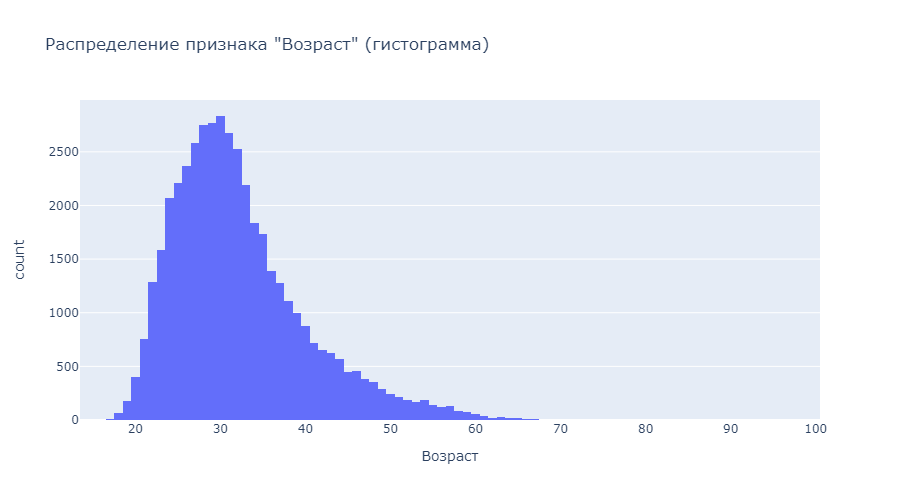

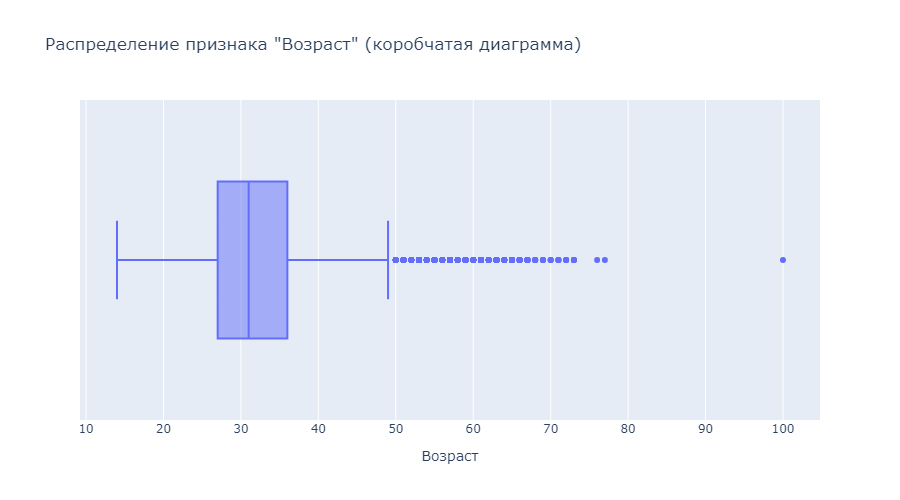

In [14]:
age_hist = px.histogram(
    data_hh,
    title='Распределение признака "Возраст" (гистограмма)',
    x='Возраст',
    width=900
)
age_box = px.box(
    data_hh,
    title='Распределение признака "Возраст" (коробчатая диаграмма)',
    x='Возраст',
    width=900
)
age_hist.show()
age_box.show()

* Из гистограммы видно, что мода распределения равна 30 годам.
* Из коробчатой диаграмммы видно, что возраст большинства соискателей находится в диапазоне от 27 до 36 лет (межквартильный размах).
* К аномалиям я бы причислил единственное значение в 100 лет. Остальные же (от 50 до 77) можно не считать аномалиями, потому что в этом диапазоне люди ещё способны работать, если здоровье позволяет.

2. Постройте распределение признака **"Опыт работы (месяц)"**. Опишите данное распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится опыт работы большинства соискателей? Есть ли аномалии для признака опыта работы, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

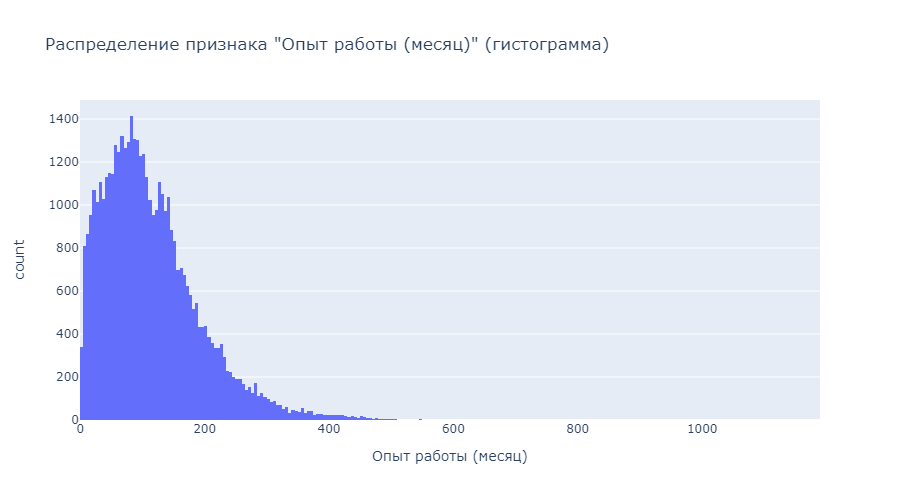

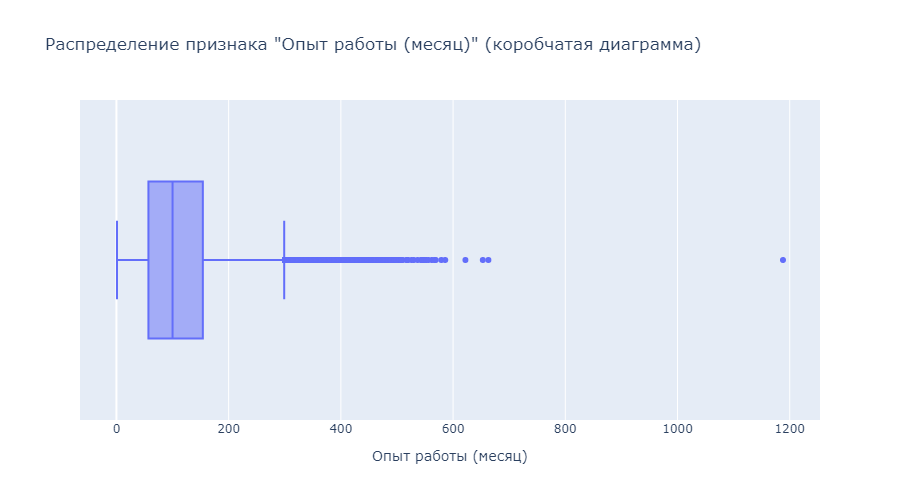

In [15]:
work_exp_hist = px.histogram(
    data_hh,
    x='Опыт работы (месяц)',
    title='Распределение признака "Опыт работы (месяц)" (гистограмма)',
    width=900
)
work_exp_box = px.box(
    data_hh,
    x='Опыт работы (месяц)',
    title='Распределение признака "Опыт работы (месяц)" (коробчатая диаграмма)',
    width=900
)
work_exp_hist.show()
work_exp_box.show()

* Из гистограммы видно, что мода распределения - это диапазон от 80 до 84 месяцев.
* Опыт работы большинства соискателей находится в диапазоне от 57 до 154 месяцев (межквартильный размах в коробчатой диаграмме).
* В признаке есть одна аномалия - 1188 месяцев работы (99 лет), что можно причислить к невозможному для человека значению.

3. Постройте распределение признака **"ЗП (руб)"**. Опишите данное распределение, отвечая на следующие вопросы: каковы предельные значения признака, в каком примерном интервале находится заработная плата большинства соискателей? Есть ли аномалии для признака возраста? Обратите внимание на гигантские размеры желаемой заработной платы.
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*


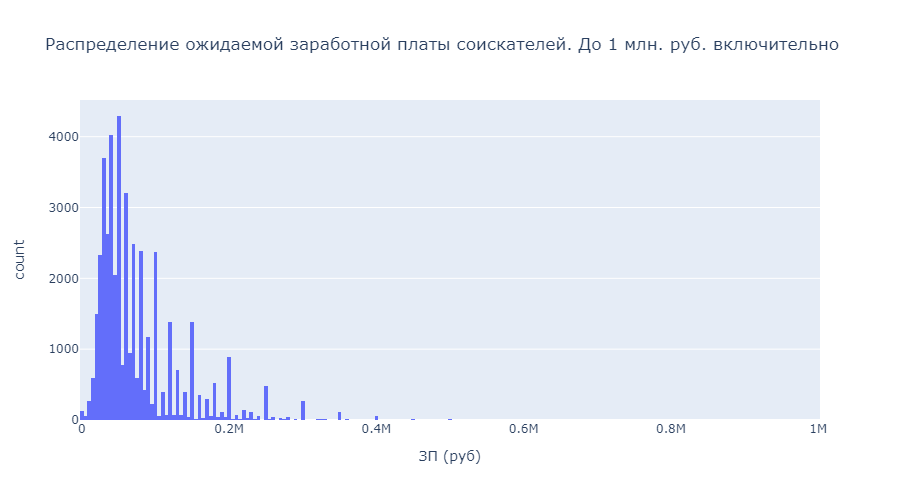

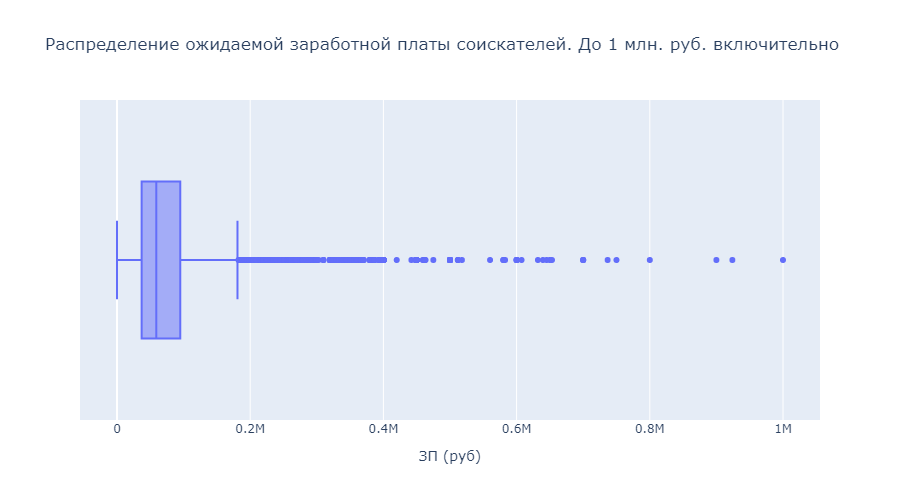

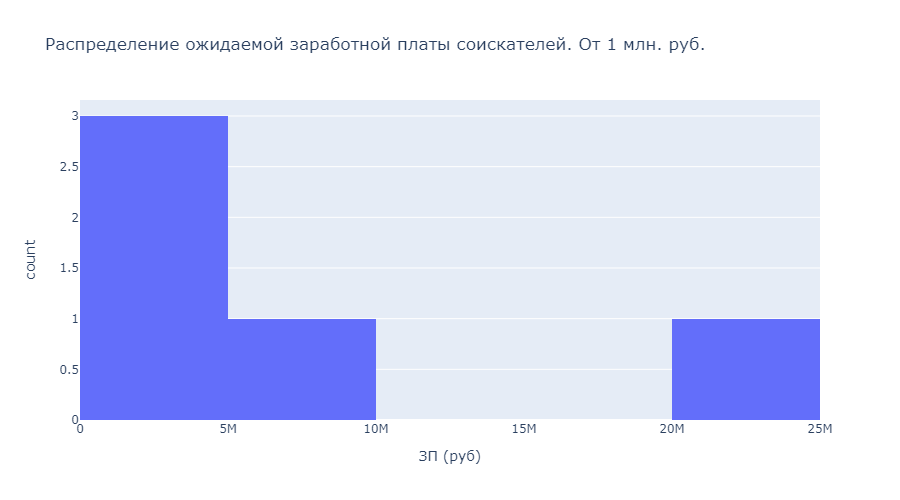

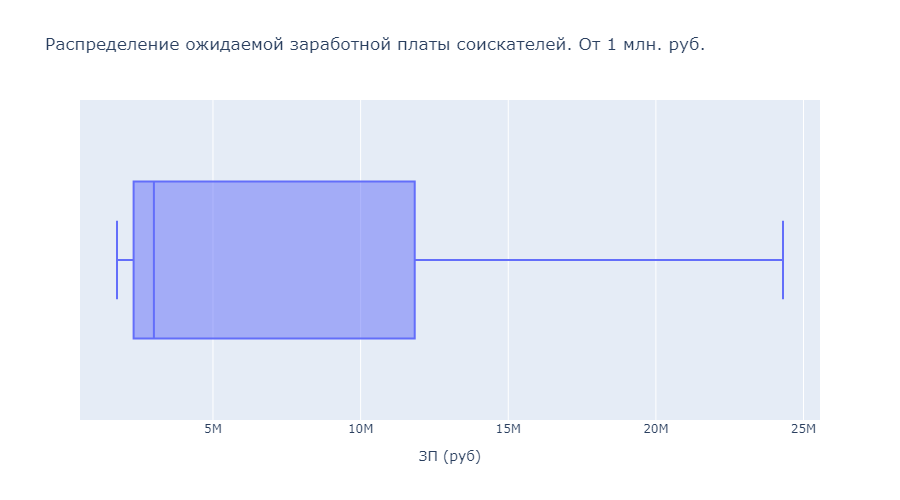

In [16]:
salary_hist_cleaned = px.histogram(
    data_hh[data_hh['ЗП (руб)'] <= 1e6],
    x='ЗП (руб)',
    title='Распределение ожидаемой заработной платы соискателей. До 1 млн. руб. включительно',
    nbins=300,
    width=900
)
salary_box_cleaned = px.box(
    data_hh[data_hh['ЗП (руб)'] <= 1e6],
    x='ЗП (руб)',
    title='Распределение ожидаемой заработной платы соискателей. До 1 млн. руб. включительно',
    width=900
)
salary_hist_outliers = px.histogram(
    data_hh[data_hh['ЗП (руб)'] > 1e6],
    x='ЗП (руб)',
    title='Распределение ожидаемой заработной платы соискателей. От 1 млн. руб.',
    nbins=5,
    width=900
)
salary_box_outliers = px.box(
    data_hh[data_hh['ЗП (руб)'] > 1e6],
    x='ЗП (руб)',
    title='Распределение ожидаемой заработной платы соискателей. От 1 млн. руб.',
    width=900
)
salary_hist_cleaned.show()
salary_box_cleaned.show()
salary_hist_outliers.show()
salary_box_outliers.show()

* Необходимо было построить 4 графика - первые 2 для значений менее 1 млн. руб. Другие 2 - для значений более 1 млн. руб. В противном случае, если объединять эти значения, график невозможно прочитать из-за аномальных значений.
* Мода распредления (для данных менее 1 млн. руб.) находится в диапазоне **от 47 500 руб. до 52 490 руб**.
* Мода распредления (для данных более 1 млн. руб.) находится в диапазоне **от 1.75 млн. руб. до 4.9 млн. руб**.
* Ожидаемая зарплата большинства соискателей находится в диапазоне **от 37 000 руб. до 95 000 руб**.
* Предельные значения признака - **1 руб. (минимум)** и **24.30488 млн. руб. (максимум)**.
* Все данные, в которых ожидаемая ЗП выше **1 млн. руб.**, можно считать аномальными, таких случаев всего 5 и между ними уже большой замах в значениях.
* Так же аномальными значениями можно считать ожидаемую ЗП выше **653 101 руб.** для данных, где ожидаемая ЗП ниже 1 млн. руб. Таких случаев всего 7 и между ними уже большой размах в значениях.
* Значение ожидаемой ЗП менее **1000 руб.** тоже можно считать за аномальное значение на основе логических заключений.

4. Постройте диаграмму, которая показывает зависимость **медианной** желаемой заработной платы (**"ЗП (руб)"**) от уровня образования (**"Образование"**). Используйте для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.
*Сделайте выводы по представленной диаграмме: для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы? Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?*

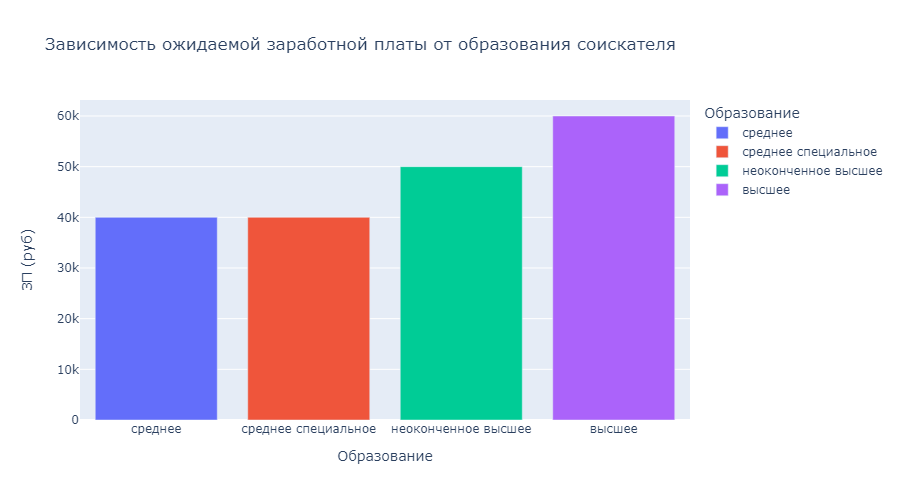

In [17]:
salary_education_group = data_hh[data_hh['ЗП (руб)'] < 1e6].groupby(['Образование'], as_index=False)
salary_education_sorted = salary_education_group['ЗП (руб)'].median().sort_values(by='ЗП (руб)')
salary_education_bar = px.bar(
    salary_education_sorted,
    x='Образование',
    y='ЗП (руб)',
    color='Образование',
    title='Зависимость ожидаемой заработной платы от образования соискателя',
    width=900
)
salary_education_bar.show()

* Наибольший медианный уровень желаемой ЗП принадлежит соискателем с высшим образованием, а наименьший - со средним и средним специальным.
* Этот признак важен при прогнозировании ожидаемой ЗП. Разница довольно высока (20 000 руб.) между наименьшими и наибольшими медианными значениями, будет полезно учитывать этот признак для прогнозирования.

5. Постройте диаграмму, которая показывает распределение желаемой заработной платы (**"ЗП (руб)"**) в зависимости от города (**"Город"**). Используйте для диаграммы данные о резюме, где желая заработная плата меньше 1 млн рублей.
*Сделайте выводы по полученной диаграмме: как соотносятся медианные уровни желаемой заработной платы и их размах в городах? Как вы считаете, важен ли признак города при прогнозировании заработной платы?*

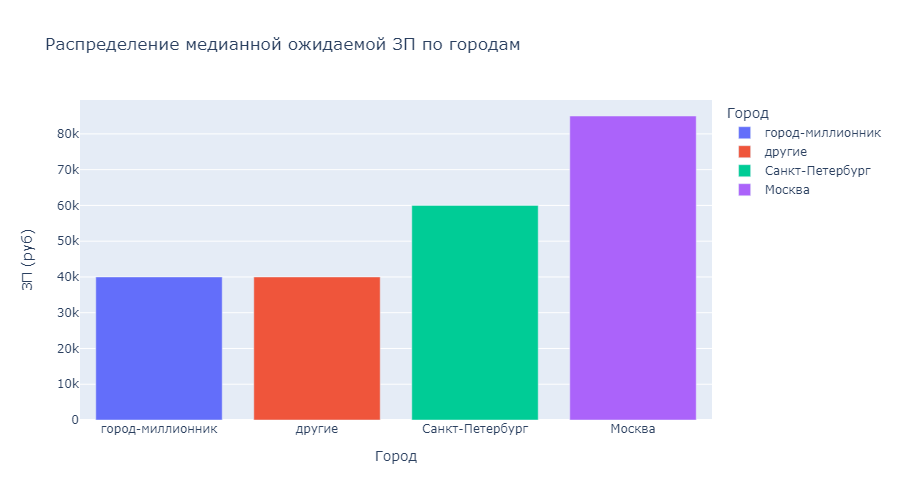

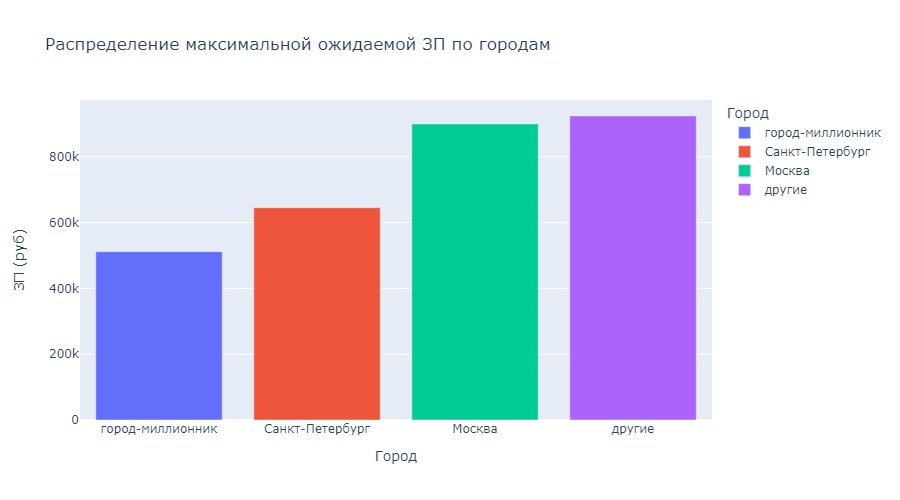

In [18]:
salary_city_grouped_median = data_hh[data_hh['ЗП (руб)'] < 1e6].groupby('Город', as_index=False)
salary_city_grouped_max = data_hh[data_hh['ЗП (руб)'] < 1e6].groupby('Город', as_index=False)
salary_city_sorted_median = salary_city_grouped_median['ЗП (руб)'].median().sort_values(by='ЗП (руб)')
salary_city_sorted_max = salary_city_grouped_max['ЗП (руб)'].max().sort_values(by='ЗП (руб)')

salary_city_median_bar = px.bar(
    salary_city_sorted_median,
    x='Город',
    y='ЗП (руб)',
    color='Город',
    title='Распределение медианной ожидаемой ЗП по городам',
    width=900
)
salary_city_max_bar = px.bar(
    salary_city_sorted_max,
    x='Город',
    y='ЗП (руб)',
    color='Город',
    title='Распределение максимальной ожидаемой ЗП по городам',
    width=900
)
salary_city_median_bar.show()
salary_city_max_bar.show()

* Наибольший показатель медианной ожидаемой ЗП находится в Москве. На втором месте идёт Санкт-Петербург. Города-миллионники и остальные(другие) не отличаются по медианной ожидаемой ЗП.
* Данный признак важен для прогнозирования ЗП, т.к. разница в городах может влиять на ЗП более, чем в 2 раза.

6. Постройте **многоуровневую столбчатую диаграмму**, которая показывает зависимость медианной заработной платы (**"ЗП (руб)"**) от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**. Проанализируйте график, сравнив уровень заработной платы в категориях.

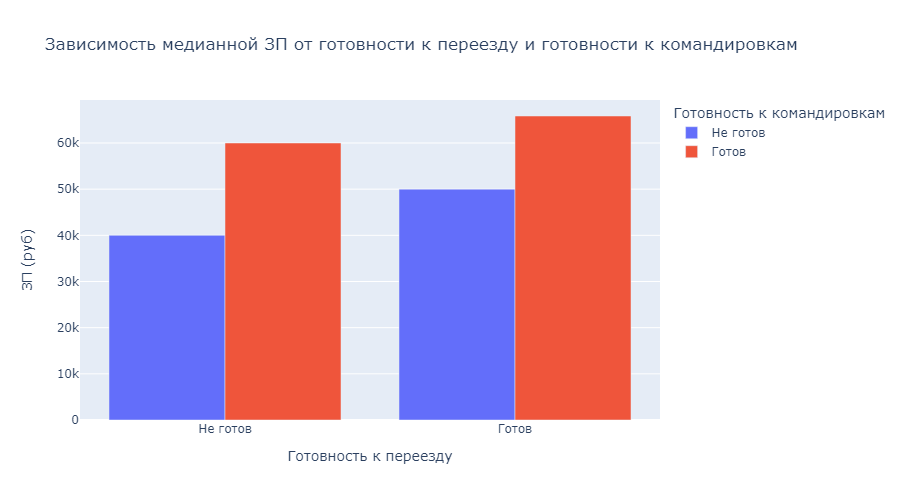

In [19]:
reloc_string = data_hh['Готовность к переезду'].apply(lambda r: 'Готов' if r else 'Не готов')
trip_string = data_hh['Готовность к командировкам'].apply(lambda t: 'Готов' if t else 'Не готов')
reloc_trip = pd.concat([reloc_string, trip_string, data_hh['ЗП (руб)']], axis=1)
salary_reloc_trip_grouped = reloc_trip.groupby(['Готовность к переезду', 'Готовность к командировкам'], as_index=False)
salary_reloc_trip_sorted = salary_reloc_trip_grouped['ЗП (руб)'].median().sort_values(by='ЗП (руб)')

salary_reloc_trip_bar = px.bar(
    salary_reloc_trip_sorted,
    x='Готовность к переезду',
    y='ЗП (руб)',
    color='Готовность к командировкам',
    barmode='group',
    title='Зависимость медианной ЗП от готовности к переезду и готовности к командировкам',
    width=900
)
salary_reloc_trip_bar.show()

* Соискатели, которые готовы одновременно к командировкам и переездам, имеют наибольшую медианную ожидаемую ЗП по сравнению с остальными категориями.
* Соискатели, которые не готовы к командировкам(при этом неважно, готовы ли к переезду) имеют более низкую медианную ожидаемую ЗП по сравнению с теми, кто готов.
* Соискатели, которые не готовы к переезду и командировкам, имеют наименьшую медианную ожидаемую ЗП.

7. Постройте сводную таблицу, иллюстрирующую зависимость **медианной** желаемой заработной платы от возраста (**"Возраст"**) и образования (**"Образование"**). На полученной сводной таблице постройте **тепловую карту**. Проанализируйте тепловую карту, сравнив показатели внутри групп.

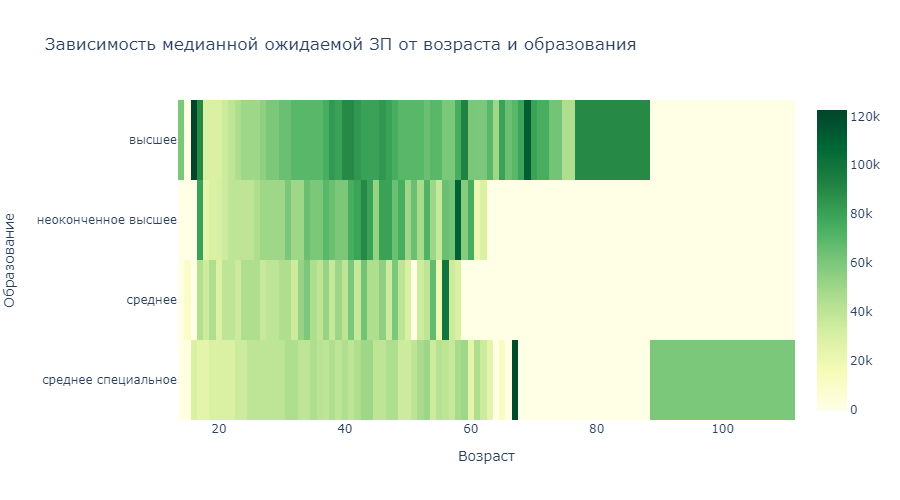

In [20]:
pivot_salary_age_edu = data_hh.pivot_table(
    values='ЗП (руб)',
    index='Образование',
    columns='Возраст',
    aggfunc='median',
    fill_value=0
)

salary_age_edu_heatmap = px.imshow(
    pivot_salary_age_edu,
    color_continuous_scale='ylgn',
    title='Зависимость медианной ожидаемой ЗП от возраста и образования',
    width=900
)
salary_age_edu_heatmap.show()

* Из тепловой карты видно, что интенсивность роста медианной желаемой ЗП выше всего у соискателей с высшим образованием. На втором месте идут соискатели с неоконченным высшим.
* В тепловую карту попала аномалия, где у соискателя возраст 100. Необходимо произвести очистку данных, после чего проанализировать показатели ещё раз.

8. Постройте **диаграмму рассеяния**, показывающую зависимость опыта работы (**"Опыт работы (месяц)"**) от возраста (**"Возраст"**). Опыт работы переведите из месяцев в года, чтобы признаки были в едином масштабе. Постройте на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше нее - аномалии в наших данных (опыт работы больше либо равен возрасту соискателя)

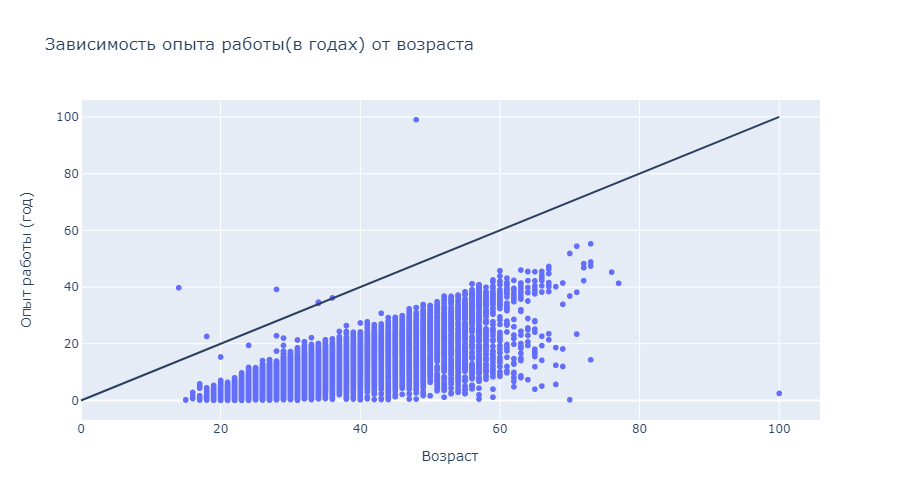

Количество точек, лежащих строго выше прямой: 7


In [21]:
exp = data_hh['Опыт работы (месяц)'] / 12
exp.name = 'Опыт работы (год)'
exp_age_group = pd.concat([exp, data_hh['Возраст']], axis=1)
exp_age_scatter = px.scatter(
    exp_age_group,
    y='Опыт работы (год)',
    x='Возраст',
    title='Зависимость опыта работы(в годах) от возраста',
    width=900
)
exp_age_scatter.update_layout(
    {
        'shapes': [
            {
            'type': 'line',
            'x0': 0,
            'y0': 0,
            'x1': 100,
            'y1': 100
            }
        ]
    }
)
exp_age_scatter.show()
exp_more_than_age = exp_age_group[(exp_age_group['Опыт работы (год)']) > (exp_age_group['Возраст'])].shape[0]
print(f'Количество точек, лежащих строго выше прямой: {exp_more_than_age}')

* На диаграмме рассеяния есть аномалии (минимум 7 штук), в которых опыт работы человека превышает его возраст. На самой диаграмме некоторые точки сливаются и их не видно, поэтому проще посчитать с помощью фильтрации.

**Дополнительные баллы**

Для получения 2 дополнительных баллов по разведывательному анализу постройте еще два любых содержательных графика или диаграммы, которые помогут проиллюстрировать влияние признаков/взаимосвязь между признаками/распределения признаков. Приведите выводы по ним. Желательно, чтобы в анализе участвовали признаки, которые мы создавали ранее в разделе "Преобразование данных".


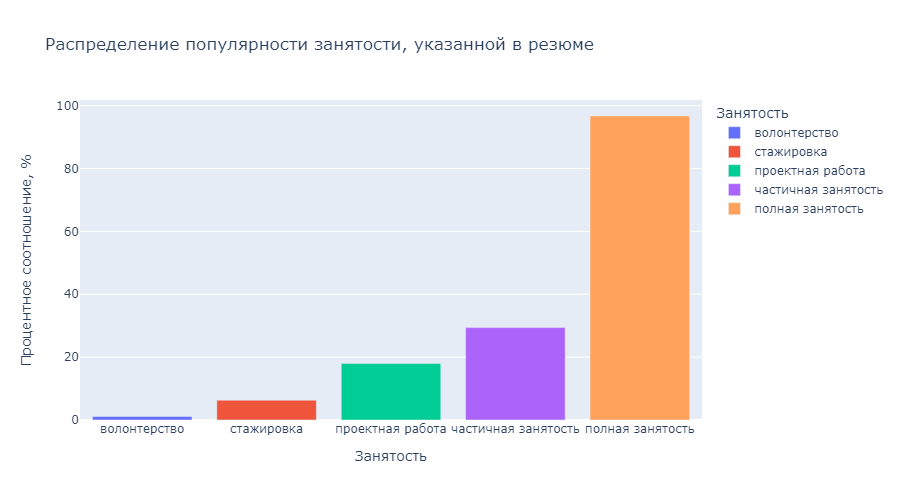

In [22]:
employment_list = [
    'полная занятость',
    'частичная занятость',
    'проектная работа',
    'стажировка',
    'волонтерство'
]
employment_info = data_hh[employment_list].mean().apply(lambda e: round(e * 100, 1)).sort_values()
employment_scatter = px.bar(
    employment_info,
    color=employment_info.index,
    labels={'index': 'Занятость', 'value': 'Процентное соотношение, %'},
    title='Распределение популярности занятости, указанной в резюме',
    width=900
)
employment_scatter.show()

* Из распределения видно, что 96.7% соискателей ищут полную занятость, а на волонтерство готовы всего лишь 1.1%.

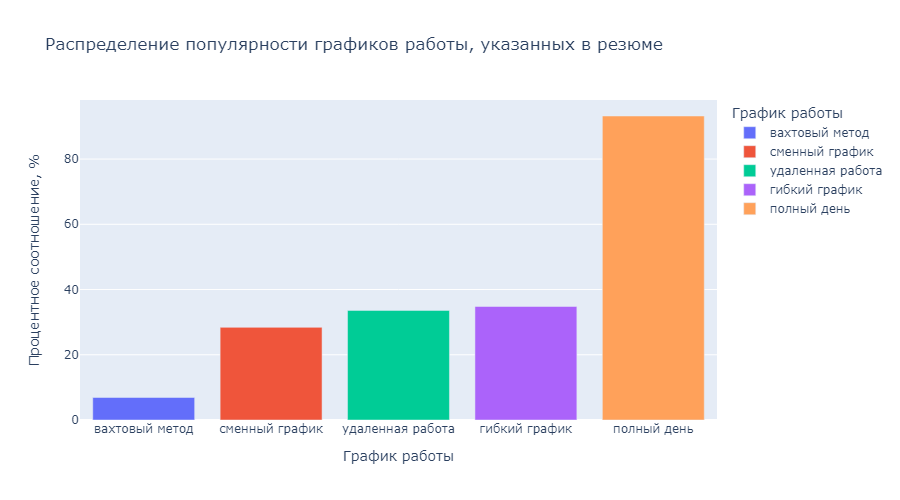

In [23]:
schedule_list = [
    'полный день',
    'гибкий график',
    'сменный график',
    'удаленная работа',
    'вахтовый метод'
]
schedule_info = data_hh[schedule_list].mean().apply(lambda s: round(s * 100, 1)).sort_values()
schedule_scatter = px.bar(
    schedule_info,
    color=schedule_info.index,
    labels={'index': 'График работы', 'value': 'Процентное соотношение, %'},
    title='Распределение популярности графиков работы, указанных в резюме',
    width=900
)
schedule_scatter.show()

* Из графика можно наблюдать, что наиболее распространенный график работы среди соискателей - полный день, 93.2% соискателей указывают его в резюме.
* Вахтовый метод рассматривает наименьшее количество людей, его указывают всего 6.9% соискателей.

# Очистка данных

1. Начнем с дубликатов в наших данных. Найдите **полные дубликаты** в таблице с резюме и удалите их. 

In [24]:
duplicates = data_hh[data_hh.duplicated()].shape[0]
print(f'Количество полных дубликатов: {duplicates}')
data_hh.drop_duplicates(inplace=True)

Количество полных дубликатов: 161


2. Займемся пропусками. Выведите информацию **о числе пропусков** в столбцах. 

In [25]:
columns_with_null = {}

for column in data_hh.columns:
    null_rows = data_hh[column].isna().sum()
    
    if null_rows > 0:
        columns_with_null[column] = null_rows
        
for key, value in columns_with_null.items():
    print(f'Признак: {key}. Число пустых значений: {value}.')

Признак: Последнее/нынешнее место работы. Число пустых значений: 1.
Признак: Последняя/нынешняя должность. Число пустых значений: 2.
Признак: Опыт работы (месяц). Число пустых значений: 168.


3. Итак, у нас есть пропуски в 3ех столбцах: **"Опыт работы (месяц)"**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**. Поступим следующим образом: удалите строки, где есть пропуск в столбцах с местом работы и должностью. Пропуски в столбце с опытом работы заполните **медианным** значением.

In [26]:
data_hh['Опыт работы (месяц)'].fillna(data_hh['Опыт работы (месяц)'].median(), inplace=True)
data_hh.dropna(axis=0, thresh=data_hh.shape[1], inplace=True)
exp_mean = round(data_hh['Опыт работы (месяц)'].mean())
print(f'Результирующее среднее значение в столбце "Опыт работы (месяц)": {exp_mean}')

Результирующее среднее значение в столбце "Опыт работы (месяц)": 114


4. Мы добрались до ликвидации выбросов. Сначала очистим данные вручную. Удалите резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей.

In [27]:
mask_salary_outliers = (data_hh['ЗП (руб)'] < 1e3) | (data_hh['ЗП (руб)'] > 1e6)
outliers_salary = data_hh[mask_salary_outliers].shape[0]
# Invert mask via ~ to save all cleaned data
data_hh = data_hh[~(mask_salary_outliers)]
print(f'Количество выбросов, где ЗП менее 1 тыс. руб. или более 1 млн. руб.: {outliers_salary}')

Количество выбросов, где ЗП менее 1 тыс. руб. или более 1 млн. руб.: 89


5. В процессе разведывательного анализа мы обнаружили резюме, в которых **опыт работы в годах превышал возраст соискателя**. Найдите такие резюме и удалите их из данных


In [28]:
mask_exp_outliers = data_hh['Опыт работы (месяц)'].apply(lambda exp: exp / 12) > data_hh['Возраст']
outliers_exp = data_hh[mask_exp_outliers].shape[0]
# Invert mask via ~ to save all cleaned data
data_hh = data_hh[~(mask_exp_outliers)]
print(f'Количество выбросов, где опыт работы превышает возраст соискателя: {outliers_exp}')

Количество выбросов, где опыт работы превышает возраст соискателя: 7


6. В результате анализа мы обнаружили потенциальные выбросы в признаке **"Возраст"**. Это оказались резюме людей чересчур преклонного возраста для поиска работы. Попробуйте построить распределение признака в **логарифмическом масштабе**. Добавьте к графику линии, отображающие **среднее и границы интервала метода трех сигм**. Напомним, сделать это можно с помощью метода axvline. Например, для построение линии среднего будет иметь вид:

`histplot.axvline(log_age.mean(), color='k', lw=2)`

В какую сторону асимметрично логарифмическое распределение? Напишите об этом в комментарии к графику.
Найдите выбросы с помощью метода z-отклонения и удалите их из данных, используйте логарифмический масштаб. Давайте сделаем послабление на **1 сигму** (возьмите 4 сигмы) в **правую сторону**.

Выведите таблицу с полученными выбросами и оцените, с каким возрастом соискатели попадают под категорию выбросов?

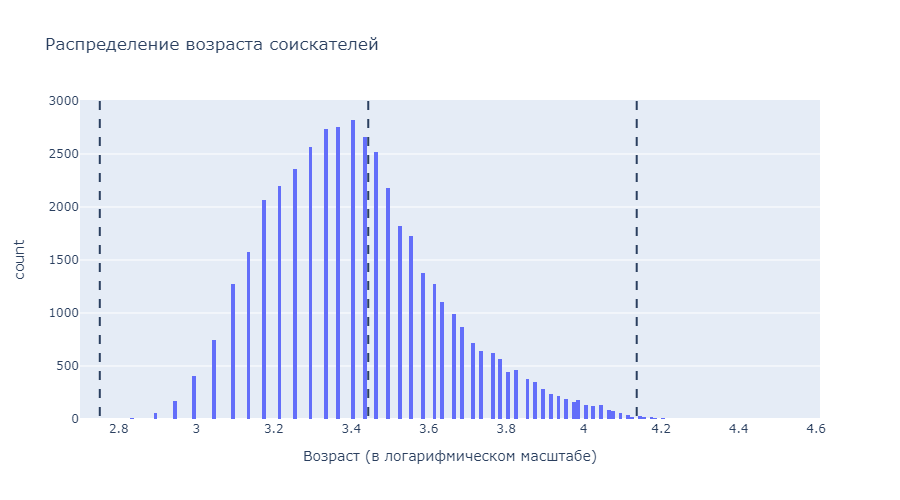

,Ищет работу на должность:,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,Опыт работы (месяц),Город,...,частичная занятость,проектная работа,стажировка,волонтерство,полный день,гибкий график,сменный график,удаленная работа,вахтовый метод,ЗП (руб)
31137,Менеджер по работе с клиентами,"ООО ""ФёрстКэшКомпани""",Менеджер по работе с клиентами,2019-04-06,Не указано,среднее,М,15,2.0,Санкт-Петербург,...,True,False,False,False,False,True,True,True,False,10000.0
32950,Тестировщик игр,OOO ЖМЫХ,Тестировщик ПО,2019-04-09,Не указано,среднее специальное,М,15,3.0,другие,...,False,False,False,False,True,False,False,False,False,2000.0
33654,Frontend-разработчик,Freelance,Frontend-разработчик,2019-04-19,Не указано,среднее специальное,М,100,30.0,Санкт-Петербург,...,True,True,True,False,True,True,False,True,False,60000.0


Числовой показатель асимметрии: 0.452, положительное значение свидетельствует о том, что распределение ассиметрично в правую сторону.


In [29]:
def outliers_z_score(data:pd.DataFrame, feature, left=3,
                    right=3, log_scale=False, log_adder=0):
    if log_scale:
        x = np.log(data[feature] + log_adder)
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - left*sigma
    upper_bound = mu + right*sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x > lower_bound) & (x < upper_bound)]
    return outliers, cleaned 

log_age = np.log(data_hh['Возраст'])
log_age_asymmetric = round(log_age.skew(), 3)

log_age_hist = px.histogram(
    log_age,
    x=log_age.values,
    labels={'x': 'Возраст (в логарифмическом масштабе)'},
    title='Распределение возраста соискателей',
    width=900
)
log_age_hist.update_layout(
    {
        'shapes': [
            {
            'type': 'line',
            'line_dash': 'dash',
            'x0': log_age.mean(),
            'y0': 3000,
            'x1': log_age.mean(),
            'y1': 0
            },
            {
            'type': 'line',
            'line_dash': 'dash',
            'x0': log_age.mean() - 3*log_age.std(),
            'y0': 3000,
            'x1': log_age.mean() - 3*log_age.std(),
            'y1': 0
            },
            {
            'type': 'line',
            'line_dash': 'dash',
            'x0': log_age.mean() + 3*log_age.std(),
            'y0': 3000,
            'x1': log_age.mean() + 3*log_age.std(),
            'y1': 0
            }
        ]
    }
)
log_age_hist.show()

outliers_age, cleaned_age = outliers_z_score(data_hh, 'Возраст', log_scale=True, right=4)
data_hh = cleaned_age
display(outliers_age)
print(f'Числовой показатель асимметрии: {log_age_asymmetric}, положительное значение свидетельствует о том, \
что распределение ассиметрично в правую сторону.')

* Под категорию выбросов попадают соискатели с возрастом меньше 16 лет, а также соискатели с возрастом 100 и более лет.